### Challenge 2 : Brownian Motion

### 2.1

In [59]:
from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Simulation pour le nouveau déplacement

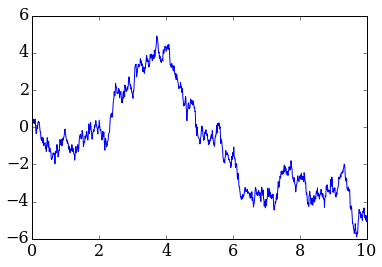

In [60]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=1000
dt=T/nt

# Diffusion coefficient and systematic constant
alpha=2.0
c=-0.3

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration
for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    
pyplot.plot(t,x)


On a bien un "random walk"

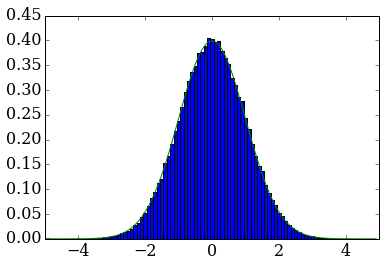

In [61]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

On a ici des positions distribuées selon une gaussienne. Comparons ceci avec ce qui suit.

Nous observons ci-dessous l'évolution dans le temps des positions des molécules qui nous intéressent, avec dans le déplacement le terme c*dt.

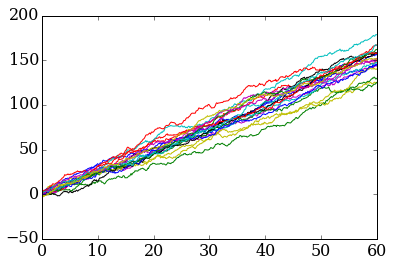

In [62]:
T=60.0
nt=500
dt=T/nt
alpha=2.0
c=2.5

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])


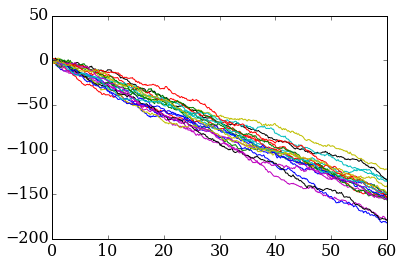

In [63]:
T=60.0
nt=500
dt=T/nt
alpha=2.0
c=-2.5

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

En faisant varier la constante c, nous remarquons donner à la position de nos molécules une tendance générale.

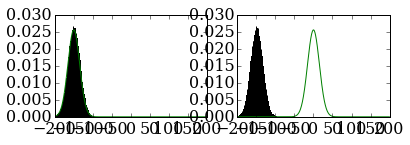

In [64]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-200,200,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram
figure()

sigmat2=2*alpha*T+sigma**2

subplot(221)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))


subplot(222)
pyplot.hist(x[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

On remarque que le facteur c*dt a fait bouger la moyenne. Après quelques essais on se rend vite compte que la moyenne est c*T

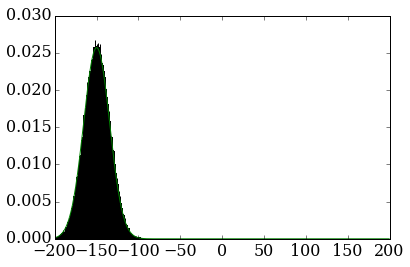

In [65]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-200,200,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))


Pouvons-nous "deviner" l'équation de diffusion pour un tel cas? Cela semble difficile. En revanche nous avons pu déterminer l'expression de la densité en jouant avec c et T. On obtient

rho = exp(-(x-c*T)²/2(sigmat2)²)/sqrt(2*pi*(sigmat2)²)

### 2.2

Regardons le déplacement si l'on ajoute un terme de friction

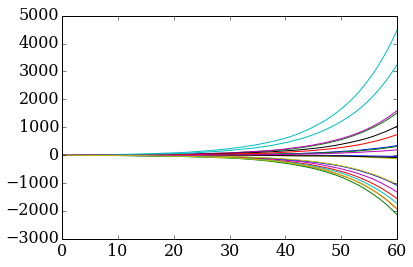

In [66]:
T=60.0
nt=500
dt=T/nt
alpha=2.0
g=-0.1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]-g*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

Il semblerait que poser un gamma négatif invite un mouvement de groupe assez important à prendre de l'ampleur. Que ce soit dans une direction ou dans l'autre.

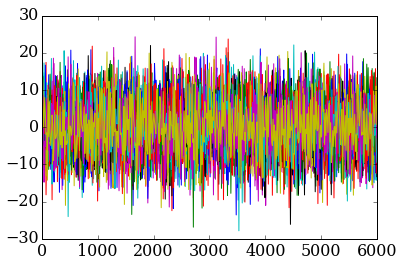

In [69]:
T=6000
nt=500
dt=T/nt
alpha=2.0
g=0.1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]-g*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

Un gamma positif, à l'inverse, ne semble pas donner l'occasion aux molécules d'adopter un mouvement général.